<a href="https://colab.research.google.com/github/adash333/ggplot2-example/blob/master/191015_ggplot2_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# original code from https://mrunadon.github.io/ThesisPlot/
# ggplot2で論文用の棒グラフと折れ線グラフを描く

library(tidyverse)

In [34]:
# dataの用意
# 今回はtibbleで用意したいと思います

# R付属のirisデータセット
# head()関数で最初の6行を表示 → data.frameではなく、tibbleでした。。。
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [35]:
# as_tibble()関数で、listやarrayをtibbleに変換
iris <- as_tibble(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [36]:
str(iris)
iris

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [39]:
# x %>% f(a, b) は f(x, a, b) と等価。
# https://heavywatal.github.io/rstats/dplyr.html
# mutate()関数で栽培条件を

irisOrdered <- iris %>%
  mutate(Cultivation.Condition = as.factor(rep(c("wild", "cultivate"), 75))) %>%
  mutate(Month = rep(c("Jan", "Feb", "Mar", "Apr", "May"), 30))
head(irisOrdered)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Cultivation.Condition,Month
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
5.1,3.5,1.4,0.2,setosa,wild,Jan
4.9,3.0,1.4,0.2,setosa,cultivate,Feb
4.7,3.2,1.3,0.2,setosa,wild,Mar
4.6,3.1,1.5,0.2,setosa,cultivate,Apr
5.0,3.6,1.4,0.2,setosa,wild,May
5.4,3.9,1.7,0.4,setosa,cultivate,Jan


# ggplot2でグラフを描く

1.   キャンバスを用意する
2.   棒グラフを描く
3.   エラーバーをつける
4.   色をつけていく
5.   表示範囲、軸のタイトルを設定
6.   最終的な微調整



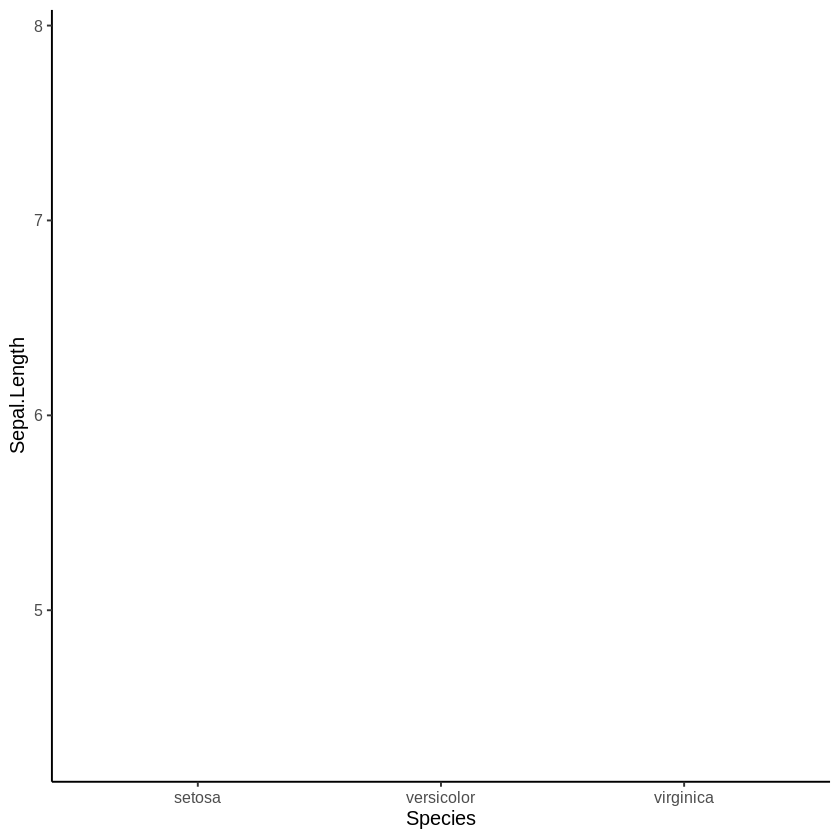

In [40]:
# 棒グラフ
# theme_classic

# グラフフォントサイズ12ptを初期設定する
# キャンバスを用意してgに格納
g <- ggplot(irisOrdered, aes(x=Species, y=Sepal.Length)) +
  theme_set(theme_classic(base_size=12)) 
g  

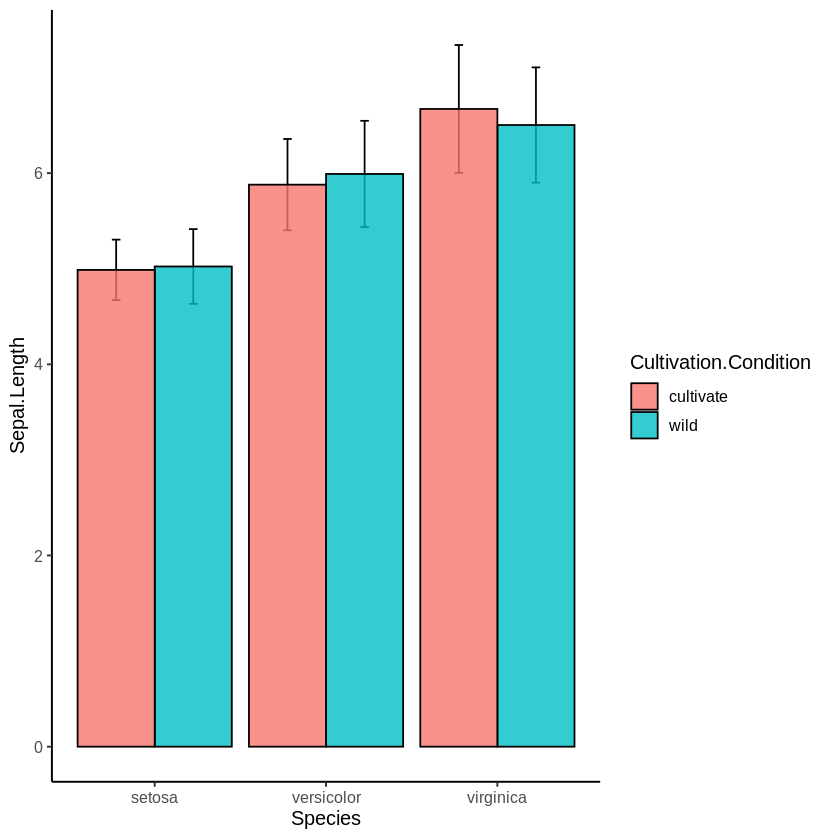

In [42]:
# キャンバスgに棒グラフを描く
# stat_summary()関数を用いる
g <- g +
  stat_summary(
    aes(fill=Cultivation.Condition),    # 塗りつぶしは栽培条件で変更する
    fun.y=mean, geom="bar",   # 栽培条件ごとに平均値を算出して、棒グラフを出す
    alpha=0.8,                # 透過性0.8
    colour="black",           # 棒グラフの周りの線を黒色固定
    position="dodge"
  )
g  

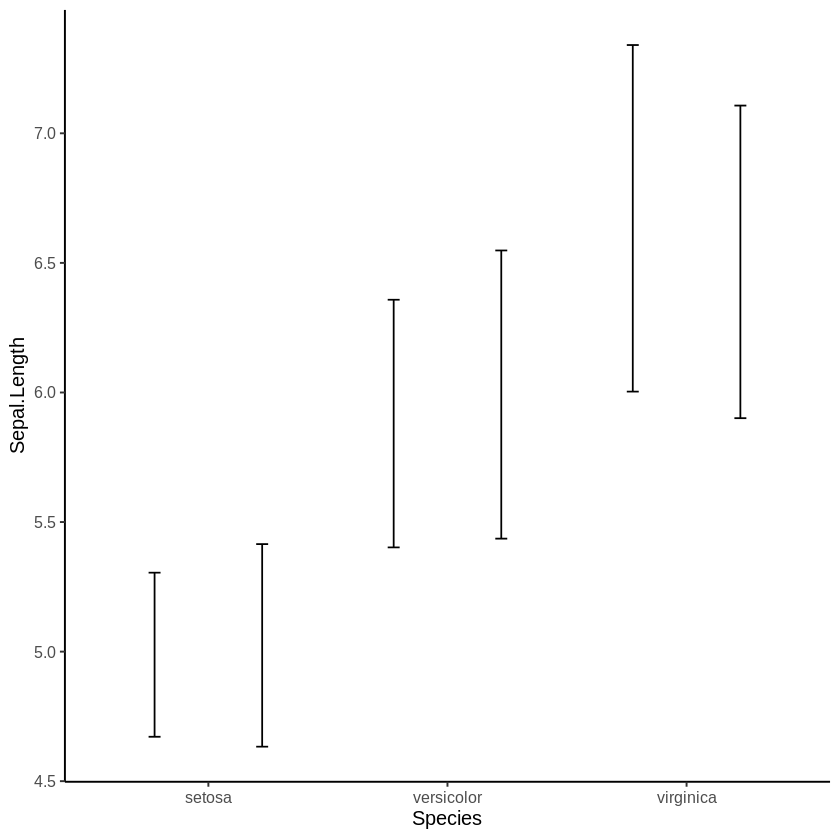

In [41]:
# 棒グラフの上からエラーバーをつける

#install.packages("Hmisc")
#library(Hmisc)

g <- g +
  stat_summary(
    aes(group=Cultivation.Condition),
    fun.data=mean_sdl,
    geom="errorbar",
    size=0.5,
    width=0.1,
    position=position_dodge(.9),
    fun.args = list(mult = 1)
  )
g

Warning message:
“Computation failed in `stat_summary()`:
Hmisc package required for this function”

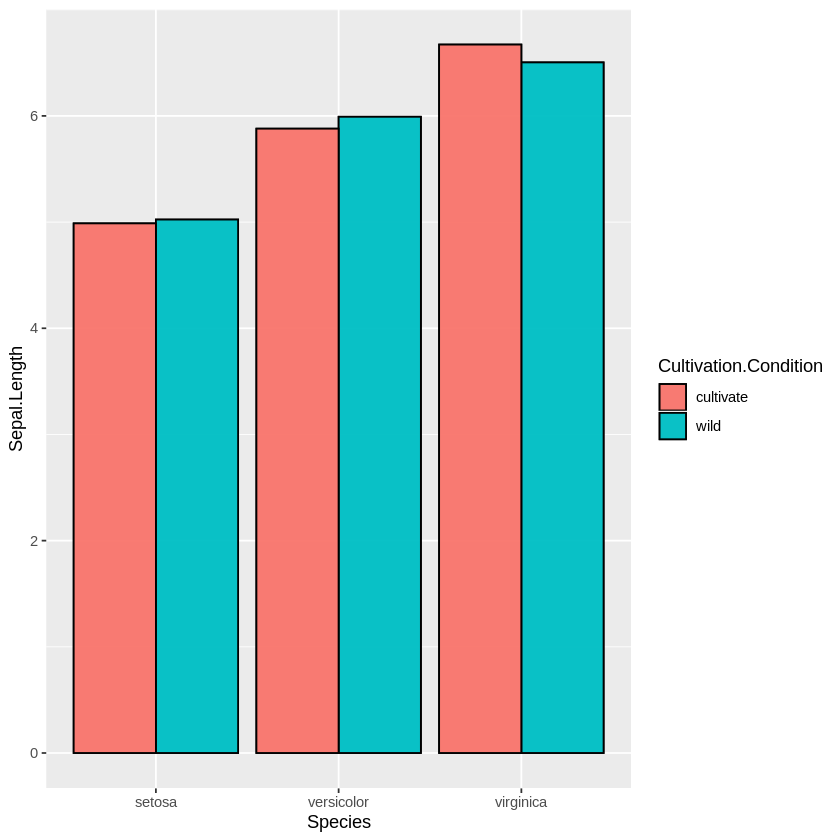

In [12]:
g<-g+stat_summary(aes(group=Cultivation.Condition),#栽培条件ごとにグループ化して処理する
                  fun.data=mean_sdl,#mean_seで標準誤差、#mean_cl_normalで95%信頼区間(正規分布)
                  geom="errorbar",#エラーバーを描きますよー
                  size=0.5,#エラーバーの線の太さ
                  width=0.1,#ぴょんって横にでてるヤツの幅
                  position=position_dodge(.9))
                  g